Задание 1)
Добавим новый аттрибут quality_category - признак, преобразующий числовую оценку качества в три категории (Низкое: 3-5, Среднее: 6, Высокое: 7-8). 

In [50]:
import pandas as pd


df = pd.read_csv('winequality-red.csv')

df['quality_category'] = pd.cut(df['quality'], 
                                 bins=[0, 5, 6, 10], 
                                 labels=['Низкое', 'Среднее', 'Высокое'])

print('Распределение по категориям качества:')
print(df['quality_category'].value_counts())

Распределение по категориям качества:
quality_category
Низкое     744
Среднее    638
Высокое    217
Name: count, dtype: int64


Задание 2) 
Причесывание датасета

In [51]:
import numpy as np

print('Исходный размер датасета:', df.shape)

duplicates = df.duplicated().sum()
print(f'Найдено дубликатов: {duplicates}')
df = df.drop_duplicates()
print('После удаления дубликатов:', df.shape)

print('\nПропущенные значения:')
print(df.isna().sum())

def iqr(df, columns):
    df_clean = df.copy()
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
        print(f'{col}: выбросов {outliers}')
        
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

numeric_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                'density', 'pH', 'sulphates', 'alcohol']

print('\nУдаление выбросов по методу IQR:')
df_clean = iqr(df, numeric_cols)

print(f'\nРазмер после очистки: {df_clean.shape}')
print(f'Удалено строк: {df.shape[0] - df_clean.shape[0]}')

df = df_clean.copy()

Исходный размер датасета: (1599, 13)
Найдено дубликатов: 240
После удаления дубликатов: (1359, 13)

Пропущенные значения:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_category        0
dtype: int64

Удаление выбросов по методу IQR:
fixed acidity: выбросов 41
volatile acidity: выбросов 19
citric acid: выбросов 1
residual sugar: выбросов 112
chlorides: выбросов 73
free sulfur dioxide: выбросов 23
total sulfur dioxide: выбросов 44
density: выбросов 20
pH: выбросов 16
sulphates: выбросов 23
alcohol: выбросов 2

Размер после очистки: (985, 13)
Удалено строк: 374


Для подготовки датасета к кластеризации выполнены следующие шаги: 
проверка на дубликаты (удалено 240 строк), 
проверка пропущенных значений (отсутствуют), 
удаление выбросов методом межквартильного размаха (IQR) по всем числовым признакам(удалено 374 строк). 
Итоговый размер датасета составил 985 образцов.

Задание 3)
График 1: Alcohol vs Quality

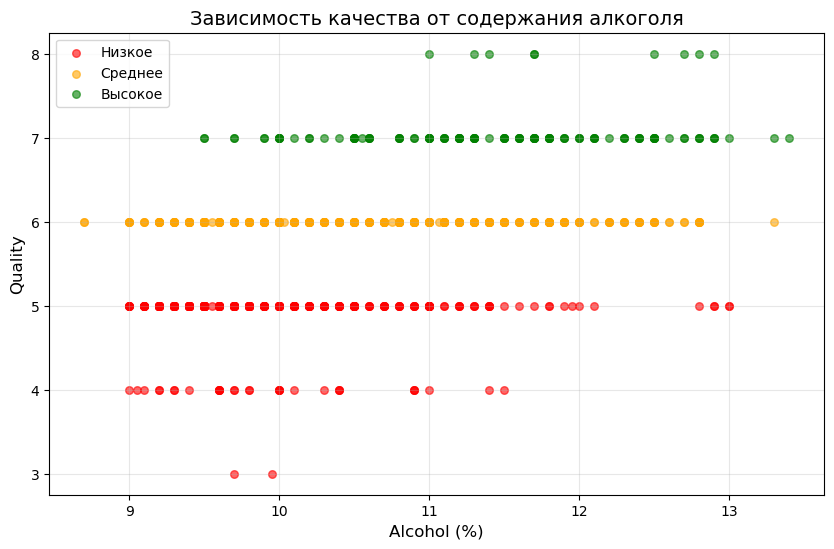

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
colors = {'Низкое': 'red', 'Среднее': 'orange', 'Высокое': 'green'}
for category in df['quality_category'].unique():
    subset = df[df['quality_category'] == category]
    plt.scatter(subset['alcohol'], subset['quality'], 
                c=colors[category], label=category, alpha=0.6, s=30)
plt.xlabel('Alcohol (%)', fontsize=12)
plt.ylabel('Quality', fontsize=12)
plt.title('Зависимость качества от содержания алкоголя', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Видны три горизонтальных кластера, соответствующие категориям качества. 
Высококачественные вина (зелёные) смещены в область alcohol > 11%, низкокачественные (красные) - в область < 11%

График 2: Volatile Acidity vs Citric Acid

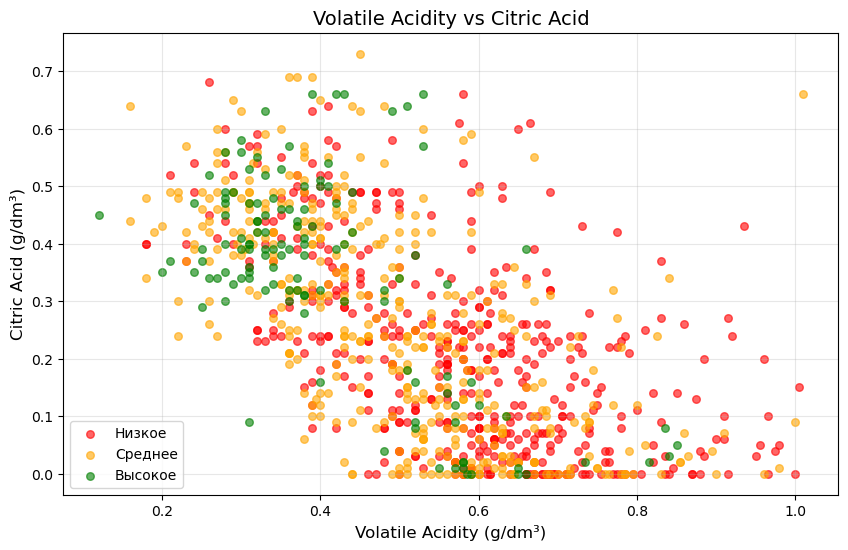

In [44]:
plt.figure(figsize=(10, 6))
for category in df['quality_category'].unique():
    subset = df[df['quality_category'] == category]
    plt.scatter(subset['volatile acidity'], subset['citric acid'], 
                c=colors[category], label=category, alpha=0.6, s=30)
plt.xlabel('Volatile Acidity (g/dm³)', fontsize=12)
plt.ylabel('Citric Acid (g/dm³)', fontsize=12)
plt.title('Volatile Acidity vs Citric Acid', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Наблюдается слабая отрицательная тенденция, высококачественные вина тяготеют к области низкой volatile acidity и высокой citric acid, но разделение нечёткое.

График 3: Density vs Alcohol

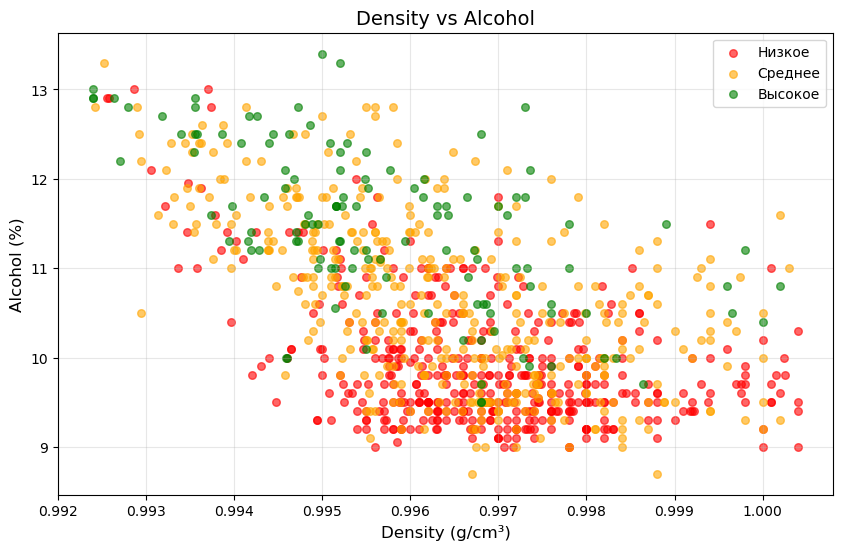

In [45]:
plt.figure(figsize=(10, 6))
for category in df['quality_category'].unique():
    subset = df[df['quality_category'] == category]
    plt.scatter(subset['density'], subset['alcohol'], 
                c=colors[category], label=category, alpha=0.6, s=30)
plt.xlabel('Density (g/cm³)', fontsize=12)
plt.ylabel('Alcohol (%)', fontsize=12)
plt.title('Density vs Alcohol', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Просматривается отрицательная диагональная зависимость: высококачественные вина концентрируются в левом верхнем углу (низкая плотность, высокий алкоголь), низкокачественные в правом нижнем 

График 4: Sulphates vs Alcohol

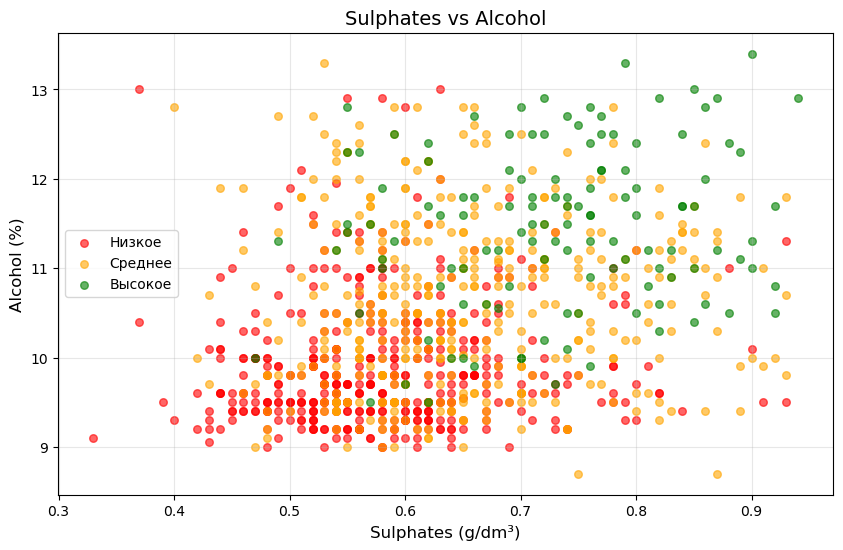

In [46]:
plt.figure(figsize=(10, 6))
for category in df['quality_category'].unique():
    subset = df[df['quality_category'] == category]
    plt.scatter(subset['sulphates'], subset['alcohol'], 
                c=colors[category], label=category, alpha=0.6, s=30)
plt.xlabel('Sulphates (g/dm³)', fontsize=12)
plt.ylabel('Alcohol (%)', fontsize=12)
plt.title('Sulphates vs Alcohol', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Высококачественные вина формируют отчётливый кластер в правом верхнем углу (sulphates > 0.6, alcohol > 11%), а низкокачественные формируют кластер в левом нижнем углу

График 5: Fixed Acidity vs pH

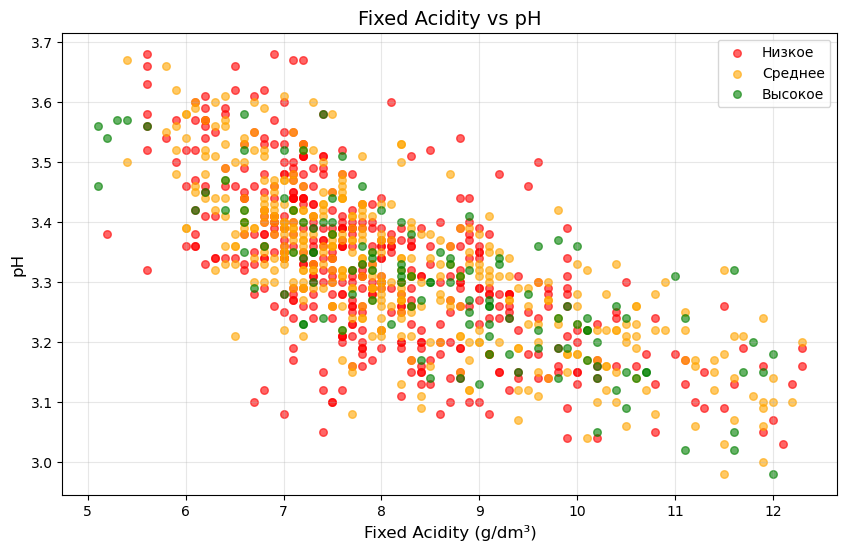

In [47]:
plt.figure(figsize=(10, 6))
for category in df['quality_category'].unique():
    subset = df[df['quality_category'] == category]
    plt.scatter(subset['fixed acidity'], subset['pH'], 
                c=colors[category], label=category, alpha=0.6, s=30)
plt.xlabel('Fixed Acidity (g/dm³)', fontsize=12)
plt.ylabel('pH', fontsize=12)
plt.title('Fixed Acidity vs pH', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

График демонстрирует корреляцию между признаками, однако чёткого разделения по категориям качества не наблюдается, точки всех трёх классов сильно перемешаны.

Задание 4)
Чтобы KMeans работал корректно, приведём все числовые столбцы к диапазону через MinMaxScaler

In [29]:
from sklearn.preprocessing import MinMaxScaler

features = ['fixed acidity','volatile acidity','citric acid','residual sugar',
'chlorides','free sulfur dioxide','total sulfur dioxide',
'density','pH','sulphates','alcohol']

X = df[features].copy()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Метод локтя

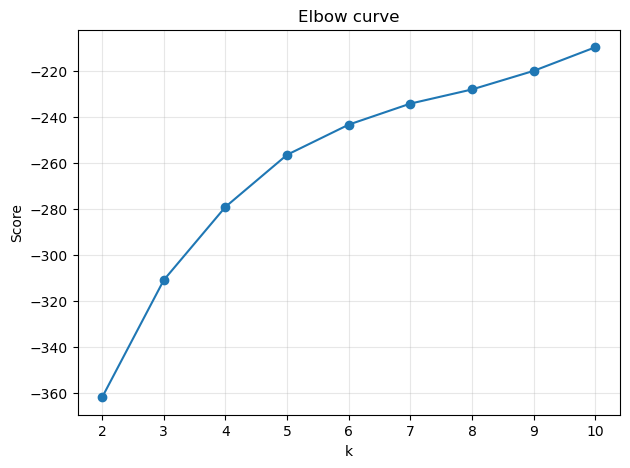

In [33]:
from sklearn.cluster import KMeans

Ks = range(2, 11)
scores = []

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    scores.append(km.score(X_scaled))

plt.figure(figsize=(7,5))
plt.plot(Ks, scores, marker='o')
plt.xlabel('k') 
plt.ylabel('Score')
plt.title('Elbow curve')
plt.grid(True, alpha=0.3)
plt.show()

На данном графике точка k=4 является локтем

In [40]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

cluster
0    244
1    189
2    212
3    340
Name: count, dtype: int64 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,8.02,0.54,0.26,2.31,0.08,22.82,73.75,1.00,3.32,0.61,9.80,5.34
1,7.29,0.44,0.26,2.14,0.06,16.15,36.28,0.99,3.38,0.69,11.72,6.22
2,10.11,0.40,0.46,2.25,0.08,10.13,26.72,1.00,3.21,0.67,10.58,5.91
3,7.47,0.64,0.10,2.09,0.08,10.98,29.54,1.00,3.37,0.58,9.97,5.38


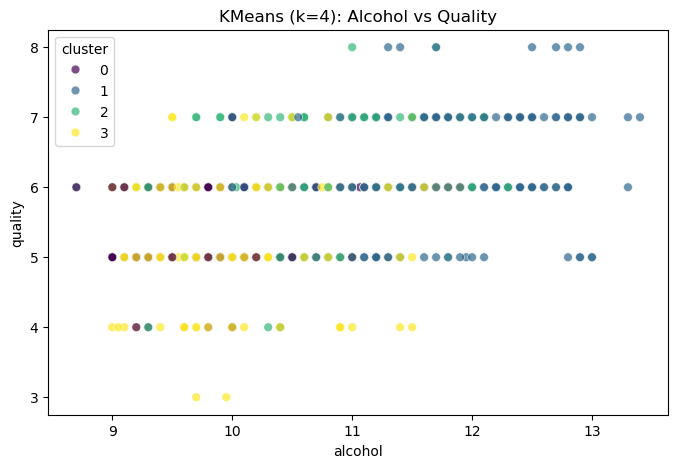

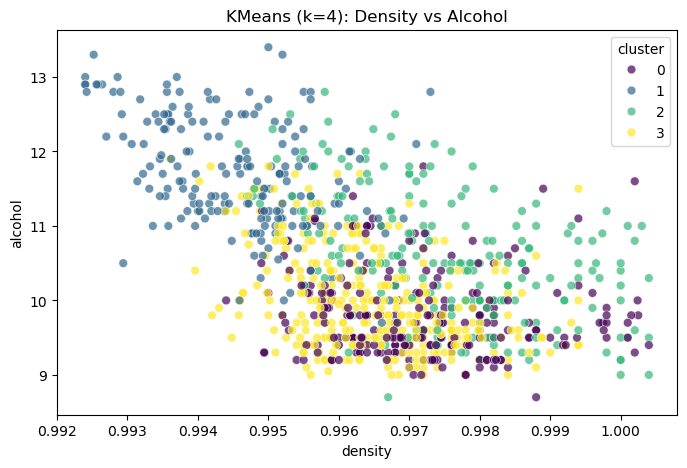

In [41]:
import seaborn as sns

print(df['cluster'].value_counts().sort_index(), '\n')
display(df.groupby('cluster')[features + ['quality']].mean().round(2))

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='alcohol', y='quality', hue='cluster',
                palette='viridis', s=40, alpha=0.7)
plt.title(f'KMeans (k={k}): Alcohol vs Quality')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='density', y='alcohol', hue='cluster',
                palette='viridis', s=40, alpha=0.7)
plt.title(f'KMeans (k={k}): Density vs Alcohol')
plt.show()

Вывод:
В ходе выполнения лабораторной работы был применён метод кластеризации K-means к датасету Red Wine Quality. Для подготовки данных был добавлен новый атрибут quality_category, разделяющий вина на три категории качества, выполнена очистка от дубликатов и выбросов методом IQR, итоговый размер выборки составил 985 образцов. Предварительный анализ графиков рассеяния показал наличие естественных групп в данных, особенно по признакам alcohol, density и sulphates, что подтвердило целесообразность применения кластеризации. Метод локтя по кривой score определил оптимальное количество кластеров k=4. Данные были масштабированы с использованием MinMaxScaler, после чего обучена модель KMeans из библиотеки sklearn. Визуализация результатов на графиках Alcohol vs Quality и Density vs Alcohol продемонстрировала, что алгоритм корректно выделил группы вин с различными физико-химическими профилями. Кластеры логично соотносятся с категориями качества, при этом k=4 позволяет выявить более детальную структуру данных по сравнению с исходными тремя категориями.